# Bike Share rides
Author: M.A.Barrios
date: 9/5/2017

Trip data from bike share in bay area

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

In [2]:
dir = '/Users/mariaalejandrabarrios/Documents/0_DataScience/babs_open_data_year_2/'
os.chdir(dir)

In [3]:
#station = pd.read_csv('201508_station_data.csv', header =0)

In [4]:
weather = pd.read_csv('201508_weather_data.csv', header =0 )

In [5]:
weather.head()

,PDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,Zip
0,9/1/2014,83.0,70.0,57.0,58.0,56.0,52.0,86.0,64.0,42.0,...,10.0,8.0,16.0,7.0,20.0,0,0.0,NaN,290.0,94107
1,9/2/2014,72.0,66.0,60.0,58.0,57.0,55.0,84.0,73.0,61.0,...,10.0,7.0,21.0,8.0,NaN,0,5.0,NaN,290.0,94107
2,9/3/2014,76.0,69.0,61.0,57.0,56.0,55.0,84.0,69.0,53.0,...,10.0,10.0,21.0,8.0,24.0,0,4.0,NaN,276.0,94107
3,9/4/2014,74.0,68.0,61.0,57.0,57.0,56.0,84.0,71.0,57.0,...,10.0,8.0,22.0,8.0,25.0,0,5.0,NaN,301.0,94107
4,9/5/2014,72.0,66.0,60.0,57.0,56.0,54.0,84.0,71.0,57.0,...,9.0,7.0,18.0,8.0,32.0,0,4.0,NaN,309.0,94107


In [11]:
weather[' Events'].unique()

array([nan, 'Rain', 'Fog', 'Fog-Rain', 'Rain-Thunderstorm'], dtype=object)

In [8]:
list(weather)

['PDT',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 ' Mean Humidity',
 ' Min Humidity',
 ' Max Sea Level PressureIn',
 ' Mean Sea Level PressureIn',
 ' Min Sea Level PressureIn',
 ' Max VisibilityMiles',
 ' Mean VisibilityMiles',
 ' Min VisibilityMiles',
 ' Max Wind SpeedMPH',
 ' Mean Wind SpeedMPH',
 ' Max Gust SpeedMPH',
 'PrecipitationIn',
 ' CloudCover',
 ' Events',
 ' WindDirDegrees',
 'Zip']

In [3]:
trip = pd.read_csv('201508_trip_data.csv', header = 0)

In [5]:
trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [7]:
trip.info(verbose = True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 11 columns):
Trip ID            354152 non-null int64
Duration           354152 non-null int64
Start Date         354152 non-null object
Start Station      354152 non-null object
Start Terminal     354152 non-null int64
End Date           354152 non-null object
End Station        354152 non-null object
End Terminal       354152 non-null int64
Bike #             354152 non-null int64
Subscriber Type    354152 non-null object
Zip Code           353874 non-null object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


In [111]:
trip.describe()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #,StartDoW
count,354152.000000,3.541520e+05,354152.000000,354152.000000,354152.000000,354152.000000
mean,676962.274416,1.046033e+03,58.446018,58.421816,422.957911,2.323426
std,138874.153513,3.001694e+04,16.738860,16.876792,159.841550,1.709249
min,432947.000000,6.000000e+01,2.000000,2.000000,9.000000,0.000000
25%,557009.750000,3.420000e+02,50.000000,50.000000,327.000000,1.000000
50%,679451.500000,5.110000e+02,62.000000,63.000000,437.000000,2.000000
75%,798026.250000,7.390000e+02,70.000000,70.000000,546.000000,4.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000,6.000000


In [4]:
def ConvertToDatetime(df, Names):
    for name in Names:
        df[name] = pd.to_datetime(df[name], errors='coerce', infer_datetime_format=True)
    return df

In [6]:
trip = ConvertToDatetime(trip, ['Start Date','End Date'])

In [50]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354152 entries, 0 to 354151
Data columns (total 11 columns):
Trip ID            354152 non-null int64
Duration           354152 non-null int64
Start Date         354152 non-null datetime64[ns]
Start Station      354152 non-null object
Start Terminal     354152 non-null int64
End Date           354152 non-null datetime64[ns]
End Station        354152 non-null object
End Terminal       354152 non-null int64
Bike #             354152 non-null int64
Subscriber Type    354152 non-null object
Zip Code           353874 non-null object
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 29.7+ MB


###  1. Which bike saw the most use over the entire period Sept 2014 -Aug. 2015

In [10]:
min(trip['Start Date'])

Timestamp('2014-09-01 00:05:00')

In [11]:
max(trip['Start Date'])

Timestamp('2015-08-31 23:26:00')

In [15]:
bkUse = trip.groupby('Bike #').count()

In [16]:
bkUse[bkUse['Duration'] == max(bkUse['Duration'])]

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Subscriber Type,Zip Code
Bike #,,,,,,,,,,
878,1121,1121,1121,1121,1121,1121,1121,1121,1121,1119


Bike 878 saw the most use, with 1121 rides over this period.

### 2. Are customers or subscribers more likely to make round trips?

In [19]:
roundTrip = trip[trip['Start Terminal'] == trip['End Terminal']]
roundTrip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
162,913212,73,2015-08-31 18:39:00,5th at Howard,57,2015-08-31 18:40:00,5th at Howard,57,456,Subscriber,94107
163,913211,7558,2015-08-31 18:38:00,Embarcadero at Sansome,60,2015-08-31 20:44:00,Embarcadero at Sansome,60,385,Customer,34
164,913210,7472,2015-08-31 18:38:00,Embarcadero at Sansome,60,2015-08-31 20:43:00,Embarcadero at Sansome,60,585,Customer,34
174,913198,353,2015-08-31 18:34:00,Townsend at 7th,65,2015-08-31 18:40:00,Townsend at 7th,65,370,Subscriber,94118
432,912838,631,2015-08-31 17:02:00,University and Emerson,35,2015-08-31 17:13:00,University and Emerson,35,253,Customer,6907


Number of round trips from Subscribers

In [26]:
subTot = roundTrip[roundTrip['Subscriber Type'] == 'Subscriber']['Trip ID'].count()
subTot

3379

Number of round trips from Customers

In [27]:
CustTot = roundTrip[roundTrip['Subscriber Type'] == 'Customer']['Trip ID'].count()
CustTot

6897

In [32]:
TotalRoundTrips = roundTrip['Trip ID'].count()

In [35]:
PercentRoundT = [100*subTot/TotalRoundTrips, 100*CustTot/ TotalRoundTrips] 

In [37]:
%matplotlib inline

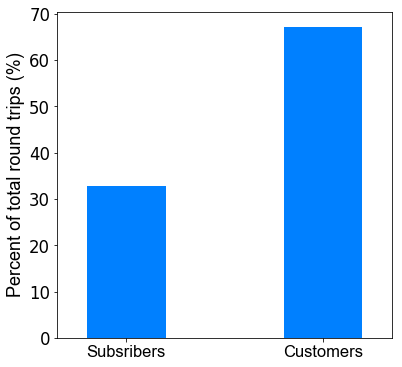

In [43]:
fig=plt.figure(figsize=(6,6))
fsz=18
x_pos=2*np.arange(2)

ax=fig.add_subplot(111)
ax.bar(x_pos, PercentRoundT, align='center', color=(0.,0.5,1.))
ax.set_ylabel('Percent of total round trips (%)', fontname="Arial", fontsize=fsz)
ax.set_xticks(x_pos)
ax.set_xticklabels(['Subsribers','Customers'], fontname="Arial", fontsize=fsz)
ax.set_xlim((-.7,2.7))
plt.tick_params(labelsize=fsz-1.5)

The number of round trips from customers is almost double the number of 
round trips from subscribers. Customers are more likely to make round trips. 

### 3. Graph of daily trips over the entire period

In [57]:
import datetime as dt

In [61]:
trip['StartDoW'] = trip['Start Date'].apply(lambda x: x.weekday() )

In [71]:
trip['Date'] = trip['Start Date'].apply(lambda x: dt.datetime(x.year, x.month, x.day)) 

In [70]:
dt.date(trip['Start Date'][0].year, trip['Start Date'][0].month,trip['Start Date'][0].day)

datetime.date(2015, 8, 31)

In [76]:
TripPerDay =trip.groupby('Date')['Trip ID'].count().to_frame(name='cnt').reset_index()
TripPerDay.head()

,Date,cnt
0,2014-09-01,368
1,2014-09-02,1319
2,2014-09-03,1404
3,2014-09-04,1389
4,2014-09-05,1265


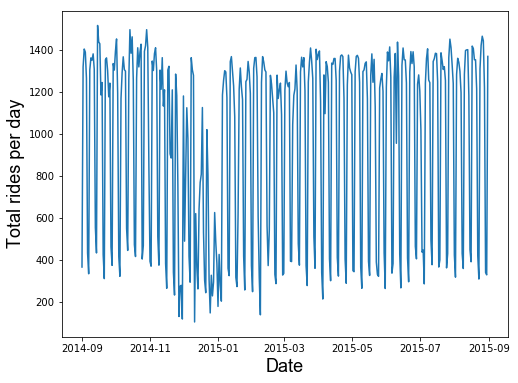

In [80]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(TripPerDay.Date, TripPerDay.cnt)
ax.set_ylabel('Total rides per day', fontname="Arial", fontsize=fsz)
ax.set_xlabel('Date', fontname="Arial", fontsize=fsz)

### 4. Are there usage pattern differences between weekday and weekend trips? 

In [81]:
weekDay = trip[trip.StartDoW < 5]

In [82]:
WeekEnd = trip[trip.StartDoW > 4]

#### Average trip duration

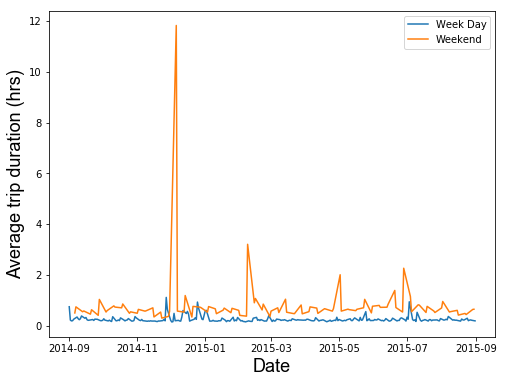

In [112]:
col ='Duration'
ylabel = 'Average trip duration (hrs)'

df1 = weekDay.groupby('Date')[col].mean().to_frame(name='val').reset_index()
df2 = WeekEnd.groupby('Date')[col].mean().to_frame(name='val').reset_index()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1.Date, df1.val/(3600.), label = 'Week Day')
ax.plot(df2.Date, df2.val/(3600.) , label = 'Weekend')
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Date', fontname="Arial", fontsize=fsz)
ax.legend()

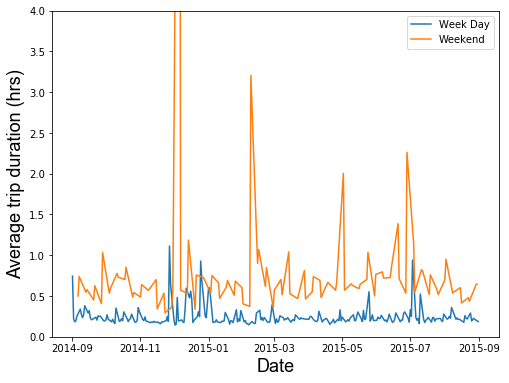

In [113]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1.Date, df1.val/(3600.), label = 'Week Day')
ax.plot(df2.Date, df2.val/(3600.), label = 'Weekend')
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Date', fontname="Arial", fontsize=fsz)
ax.set_ylim([0, 4])
ax.legend()

In [123]:
print(df1.val.mean()/60., df1.val.min()/60., df1.val.max()/3600.)
print(df2.val.mean()/60., df2.val.min()/60., df2.val.max()/3600.)

14.763497323742397 8.61422267481 1.11298245614
48.159388257164316 17.7403546099 11.8345147176


There is a clear difference in the average ride duration during weekdays and weekends. Weekend rides are typically longer, with the average ride of 48 minutes. The average ride during the week, in contrast is 15 minutes.  

#### Number of rides 

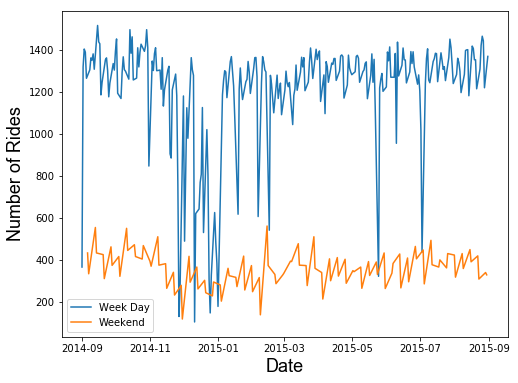

In [95]:
col ='Duration'
ylabel = 'Number of Rides'

df1 = weekDay.groupby('Date')[col].count().to_frame(name='val').reset_index()
df2 = WeekEnd.groupby('Date')[col].count().to_frame(name='val').reset_index()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1.Date, df1.val, label = 'Week Day')
ax.plot(df2.Date, df2.val, label = 'Weekend')
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Date', fontname="Arial", fontsize=fsz)
ax.legend()

Although trips are shorter during the week, there is a significantly larger rider base ; 
a larger fraction of users are probably communitng with these bikes. 

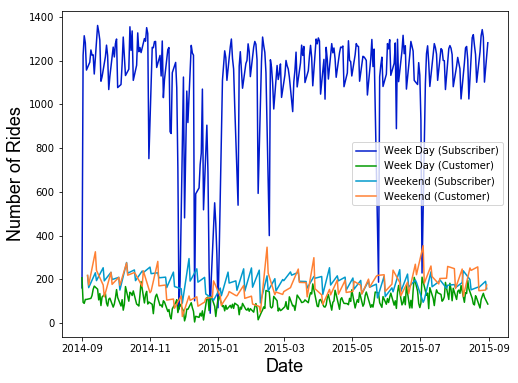

In [109]:
col ='Duration'
ylabel = 'Number of Rides'

df1 = weekDay.groupby(['Date','Subscriber Type' ])[col].count().to_frame(name='val').reset_index()
df2 = WeekEnd.groupby(['Date','Subscriber Type' ])[col].count().to_frame(name='val').reset_index()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1[df1['Subscriber Type'] == 'Subscriber'].Date, 
        df1[df1['Subscriber Type'] == 'Subscriber'].val, label = 'Week Day (Subscriber)', 
       color = (0,0.1,.8))
ax.plot(df1[df1['Subscriber Type'] == 'Customer'].Date, 
        df1[df1['Subscriber Type'] == 'Customer'].val, label = 'Week Day (Customer)', 
       color = (0,0.6,0))
ax.plot(df2[df2['Subscriber Type'] == 'Subscriber'].Date, 
        df2[df2['Subscriber Type'] == 'Subscriber'].val, label = 'Weekend (Subscriber)', 
       color = (0,0.6,.8))
ax.plot(df2[df2['Subscriber Type'] == 'Customer'].Date, 
        df2[df2['Subscriber Type'] == 'Customer'].val, label = 'Weekend (Customer)', 
       color = (1,0.5,.2))
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Date', fontname="Arial", fontsize=fsz)
ax.legend()

Most of the people using bikes during the week are subscribers, and they don't use them as much during the weekend. 

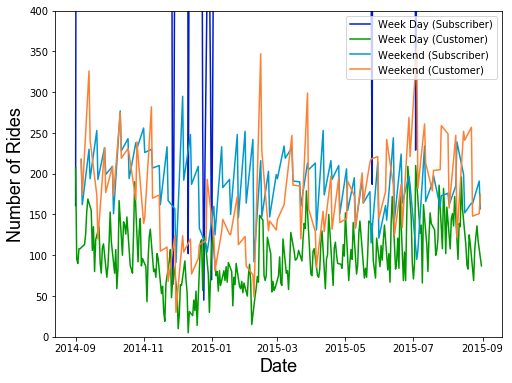

In [110]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1[df1['Subscriber Type'] == 'Subscriber'].Date, 
        df1[df1['Subscriber Type'] == 'Subscriber'].val, label = 'Week Day (Subscriber)', 
       color = (0,0.1,.8))
ax.plot(df1[df1['Subscriber Type'] == 'Customer'].Date, 
        df1[df1['Subscriber Type'] == 'Customer'].val, label = 'Week Day (Customer)', 
       color = (0,0.6,0))
ax.plot(df2[df2['Subscriber Type'] == 'Subscriber'].Date, 
        df2[df2['Subscriber Type'] == 'Subscriber'].val, label = 'Weekend (Subscriber)', 
       color = (0,0.6,.8))
ax.plot(df2[df2['Subscriber Type'] == 'Customer'].Date, 
        df2[df2['Subscriber Type'] == 'Customer'].val, label = 'Weekend (Customer)', 
       color = (1,0.5,.2))
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Date', fontname="Arial", fontsize=fsz)
ax.set_ylim([0, 400])
ax.legend()

Difference in usage between weekday and weekend for customers is small, with a slight increase in weekend usage. 

In [127]:
weekDay['hr'] = weekDay['Start Date'].apply(lambda x: x.hour )

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [129]:
WeekEnd['hr'] = WeekEnd['Start Date'].apply(lambda x: x.hour )

/Users/mariaalejandrabarrios/anaconda/envs/my_projects_env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [131]:
col ='Duration'
ylabel = 'Number of Rides'

df1 = weekDay.groupby(['hr','Subscriber Type' ])[col].count().to_frame(name='val').reset_index()
df2 = WeekEnd.groupby(['hr','Subscriber Type' ])[col].count().to_frame(name='val').reset_index()

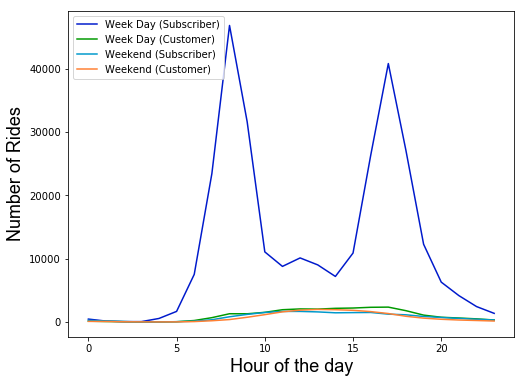

In [133]:
col ='Duration'
ylabel = 'Number of Rides'

df1 = weekDay.groupby(['hr','Subscriber Type' ])[col].count().to_frame(name='val').reset_index()
df2 = WeekEnd.groupby(['hr','Subscriber Type' ])[col].count().to_frame(name='val').reset_index()


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1[df1['Subscriber Type'] == 'Subscriber'].hr, 
        df1[df1['Subscriber Type'] == 'Subscriber'].val, label = 'Week Day (Subscriber)', 
       color = (0,0.1,.8))
ax.plot(df1[df1['Subscriber Type'] == 'Customer'].hr, 
        df1[df1['Subscriber Type'] == 'Customer'].val, label = 'Week Day (Customer)', 
       color = (0,0.6,0))
ax.plot(df2[df2['Subscriber Type'] == 'Subscriber'].hr, 
        df2[df2['Subscriber Type'] == 'Subscriber'].val, label = 'Weekend (Subscriber)', 
       color = (0,0.6,.8))
ax.plot(df2[df2['Subscriber Type'] == 'Customer'].hr, 
        df2[df2['Subscriber Type'] == 'Customer'].val, label = 'Weekend (Customer)', 
       color = (1,0.5,.2))
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Hour of the day', fontname="Arial", fontsize=fsz)
ax.legend()

Members are in fact commutting !

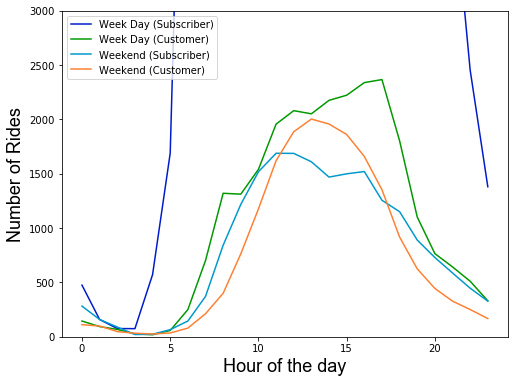

In [136]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(df1[df1['Subscriber Type'] == 'Subscriber'].hr, 
        df1[df1['Subscriber Type'] == 'Subscriber'].val, label = 'Week Day (Subscriber)', 
       color = (0,0.1,.8))
ax.plot(df1[df1['Subscriber Type'] == 'Customer'].hr, 
        df1[df1['Subscriber Type'] == 'Customer'].val, label = 'Week Day (Customer)', 
       color = (0,0.6,0))
ax.plot(df2[df2['Subscriber Type'] == 'Subscriber'].hr, 
        df2[df2['Subscriber Type'] == 'Subscriber'].val, label = 'Weekend (Subscriber)', 
       color = (0,0.6,.8))
ax.plot(df2[df2['Subscriber Type'] == 'Customer'].hr, 
        df2[df2['Subscriber Type'] == 'Customer'].val, label = 'Weekend (Customer)', 
       color = (1,0.5,.2))
ax.set_ylabel(ylabel, fontname="Arial", fontsize=fsz)
ax.set_xlabel('Hour of the day', fontname="Arial", fontsize=fsz)
ax.set_ylim([0, 3000])
ax.legend()

### Business ramifications of findings

* Bikes are mostly used during the week, though these rides are shorter than weekend rides; 14 min vs. 48 min repectively.  

* The above graphs also show most of the ridership comes from members, which use bikes mostly during the week. Based on usage as a function of time of day this cohort is using the bike share system as a means to commute. 

* Having that in mind the share company could map out business hubs and ensure there are stations near those locations to cater to these customers. 

* Because most of the rides are during the week, it woudl be mindful to implement large changes or maintenance during the weekends.

* Would also 

* It the custumer id or member id were available, one could calculate the revenue from weekend rides vs. weekday rides, segmented by customers and members. 
